<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html final.do.txt --no_mako -->
<!-- dom:TITLE: PHY321 Classical Mechanics 1 -->

# PHY321 Classical Mechanics 1
**Final  project Spring semester 2023, due Friday May 5**, midnight (1159pm)

Date: **April 26, 2023**

## Practicalities about  homeworks and projects (midterms and final)

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. How do I(we)  hand in?  Due to the extraordinary situation we are in now, the final projec should be handed in fully via D2L. You can scan your handwritten notes and upload to D2L or you can hand in everyhting (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical part should always be handed in as a jupyter notebook.

### Introduction to the final project, total score: 160  points

The relevant reading background is
1. Chapters 2-8 and 14 of Taylor

2. Lecture notes throughout the semester and homework assignments and midterm projects.

### Exercise 1, motion of a balloon (75pt)

This exercise brings us back to the beginning of the semester and
homework assignments 2 and 3, in particular exercises 5 and 6 of
homework 3. The relevant chapter of Taylor's text is chapter 2 and
partly chapter 3. The code you wrote for homework 3 may be useful.

In this exercise we will develop a model to determine the motion of a
weather balloon released from the ground. We start from a simplified
model and gradually add features to make our model more realistic.

After the balloon is released, it is driven by buoyancy. Initially, we will assume that the buoyancy force is given by a constant force, $\boldsymbol{B}$.
We assume that the motion is vertical only and label this in terms of the $z$-axis.  That is our system is one-dimensional only.
The constant buoyancy force is then given by its $z$-component only, that is $\boldsymbol{B}=B_z\boldsymbol{k}$, where $\boldsymbol{k}$ is the unit vector along the $z$-axis.
* **1a (5pt)**: Draw a diagram of the balloon and identify and label the forces. 

* **1b (5pt)**: We neglect air resistance here. What is the acceleration of the balloon?

* **1c (5pt)**: Find the position and velocity of the balloon as a function of time.

Let us now introduce air resistance, using a quadratic law: $\boldsymbol{F}_D
= −D \vert \boldsymbol{v}\vert \boldsymbol{v}$, where $D$ is a constant and $\boldsymbol{v}$
is the velocity. We are still in one dimension but have introduced
forces and velocities as vectors (boldfaced quantities).

* **1d (5pt):** Show that the acceleration of the balloon in the upward $z$ direction is $a_z = (B_z/m)−g−(D/m)|v_z|v_z$,where $v_z$ is the velocity in the $z$-direction.

* **1e (5pt):** Find the asymptotic (terminal) velocity of the balloon. Sketch the acceleration and velocity as a function of time for the model including air resistance and define the initial conditions.

The balloon is released on a windy day, with a wind blowing with a velocity
given by $\boldsymbol{w} = w_x \boldsymbol{i}$ along the horizontal $x$-axis.

* **1f (5pt):** How does the wind modify the air resistance force $\boldsymbol{F}_D$ on the balloon?

* **1g (5pt):** Draw a diagram of the system (the balloon) in this case and identify and label the forces, as you did in **1a**.

* **1h (5pt):** Find an expression for the acceleration $\boldsymbol{a}$ of the balloon. Define the initial conditions for the motion of the balloon.

* **1i (5pt):** Why do we call the motion in the $z$ and the $x$ directions as *coupled* in this case? Can you determine the motion of the balloon analytically?

* **1j (20pt):** Use now your codes from homework 3 or similar and find the velocity and position of the balloon as functions of time. Plot the position and the velocity with chosen initial conditions and discuss the motion of the balloon. Find the asymptotic (terminal) velocity of the balloon.

In a real situation, the wind velocity is smaller near the ground and
increases gradually to the full velocity $w_0$ as the balloon moves
upward. Typically, the velocity of the wind as function of the height $z$ can be described
by

$$
\boldsymbol{w}(z) = w_0 (1−\exp{(−z/d)}) \boldsymbol{i},
$$

where $d = 10$m is a length determining the change in height.

* **1k (10pt):** Rewrite your program to include this effect and plot the velocity and position as functions of time. What is the terminal velocity of the balloon now?

1j) Since this is not an energy conserving force, I won't use Euler-Cromer or the Velocity-Verlet method. I'll just use the basic euler method since that's what was used in homework 3 which this is very similar to. I'll start without wind so that I can confirm that everything is working properly by comparing to my analytically calculated terminal velocity.

In [4]:
#Starting with some general imports
%matplotlib inline

import numpy as np
from math import *
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [80]:
#1j)
def release_balloon(wx = 0,tfinal = 10,changing=False):
    m = 1 #mass
    B = 12 #buoyancy
    g = 9.81
    delta_t = .001

    #I will set drag coefficient using the fact that we know for a sphere, D = gamma * diameter^2. Gamma is .25 for spheres in STP
    #    conditions (such as air). I'll estimate our ball to have a diameter of 50cm = .5m, thus D = .25 * .5^2 = .0625.
    D = .0625


    times = np.arange(0, tfinal,delta_t) #went from time 0 to 10 with steps of .001
    #------------------

    #since this is multidimensional, my position, velocity and acceleration arrays need to be too
    num_times = len(times)
    r = np.zeros((num_times,2))
    v = np.zeros((num_times,2))

    r[0] = np.array([0,0]) #I'm choosing to start at (0,0)
    v[0] = np.array([0,0]) #I'm choosing to start with no velocity in either direction, so balloon just released.

    for i in range(1,num_times): #don't want to change index 0, want to go through to the end i.e. index num_times - 1
        #I'm going to change r[i] and v[i] using r[i-1] and v[i-1]
        #could have done range(num_times-1) and changed r[i+1] and v[i+1] using r[i] and v[i]

        #first calculate force and acceleration based off of previous velocity
        if(changing): #added in for part k
            v_rel = np.array([v[i-1][0] - wx*(1-np.exp(-r[i-1,1]/10)),v[i-1][1]])
        else:
            v_rel = np.array([v[i-1][0] - wx,v[i-1][1]]) #drag depends on velocity relative to wind, just subtract wx from vx
            
        vrel_mag = sqrt(sum(v_rel*v_rel))

        force_ar = -D * v_rel * vrel_mag #air resistance
        force_gravity = np.array([0,-g*m])
        force_buoy = np.array([0,B])
        acceleration = (force_gravity + force_buoy + force_ar)/m

        v[i] = v[i-1] + delta_t*acceleration
        r[i] = r[i-1] + delta_t*v[i-1]



    print("All plots are for delta T of .001 seconds")


    plt.subplot(2,2,1)
    plt.suptitle("Question 1i, wind: " + str(wx))
    plt.plot(times, r[:,1]) #y-coordinate is second column of every row
    plt.xlabel("time")
    plt.ylabel("height (z)")

    plt.subplot(2,2,2)
    plt.plot(times, r[:,0])
    plt.xlabel("time")
    plt.ylabel("distance (x)")

    plt.subplot(2,2,3)
    plt.plot(times, v[:,1])
    plt.xlabel("time")
    plt.ylabel("z velocity (v_z)")
    plt.tight_layout()

    plt.subplot(2,2,4)
    plt.plot(times, v[:,0])
    plt.xlabel("time")
    plt.ylabel("x velocity (v_x)")
    
    print("final velocity: ",sqrt(sum(v[-1]*v[-1])))
    
    if(wx != 0):
        print("final horizontal velocity: ", v[-1,0])
        print("final vertical velocity: ", v[-1,1])

All plots are for delta T of .001 seconds
final velocity:  5.912233137011207


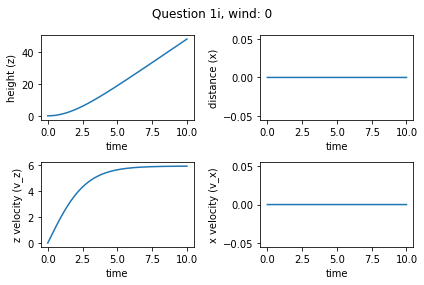

In [81]:
release_balloon(wx = 0, tfinal = 10)

The above looks like what we would expect for no wind. Velocity in the x direction stays 0 so there's never any movement in the x direction, and velocity in the z direction increases until a terminal velocity, at which point the height increases at a steady rate. We can check what the terminal velocity is and see if this matches analytical calculations.

As printed out above, we got a final velocity of 5.912233. The expected terminal velocity would be:

In [72]:
print("expected terminal velocity: ", sqrt((B-m*g)/D))

expected terminal velocity:  5.919459434779496


Great! It looks like it's working properly. Our final velocity is slightly below the terminal velocity, which is exactly what we'd expect since I didn't run the simulation for a very long time.

If we were to run it for a longer time. We'd get something much much closer to the expected terminal velocity, as shown below:

All plots are for delta T of .001 seconds
final velocity:  5.919459434778897


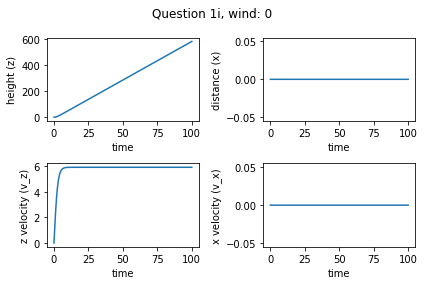

In [82]:
release_balloon(wx = 0, tfinal = 100)

Now that it's all working properly, I'll add in the wind.

All plots are for delta T of .001 seconds
final velocity:  11.382485345948465
final horizontal velocity:  9.738549412312118
final vertical velocity:  5.892506087793791


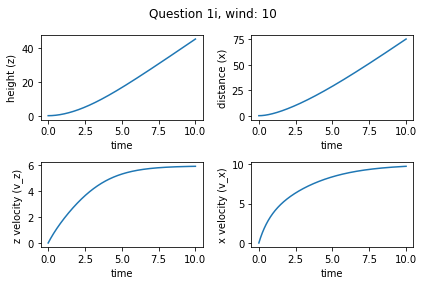

In [83]:
release_balloon(wx=10, tfinal = 10)

Again, this looks very good. We can see horizontal acceleration until the horizontal velocity is the wind speed, at which point the "horizontal terminal velocity" is reached (because of coupling with the vertical velocity, it will take longer to reach this terminal velocity). Vertically, the balloon also accelerates to the "vertical terminal velocity", this time slower than before due to coupling with the horizontal velocity. In both the x and z directions we see acceleration up to a steady velocity. To show more precise values for the terminal velocity, I'll run it again for a longer time frame. 

All plots are for delta T of .001 seconds
final velocity:  11.620671237064789
final horizontal velocity:  9.9999999999976
final vertical velocity:  5.919459434778897


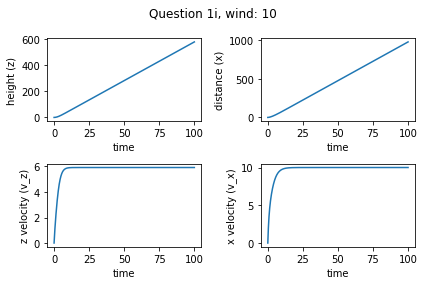

In [84]:
release_balloon(wx=10, tfinal = 100)

What we see here is actually pretty cool. As the balloon accelerates horizontally, it experiences less and less of a horizontal velocity relative to the wind. As it approaches the speed of the wind it no longer experiences horizontal air resistance, so the air resistance becomes increasingly vertical. This results in the balloon eventually reaching the exact speed of the wind, therefore no longer experiencing horizontal air resistance, which results in the same vertical terminal velocity as before being reached. We again see a final vertical velocity of 5.919459 and now have a final horizontal velocity of 10 (wind speed), giving a total terminal velocity of 11.62067. If we were to increase the speed of the wind (I played around with it to confirm) we would just need to wait longer to reach the terminal velocity. 

1k) Changing the wind to be a function of height. My above function wasn't written with this in mind, so I went back and edited a bit to allow for this.

All plots are for delta T of .001 seconds
final velocity:  10.561289895080504
final horizontal velocity:  8.837035511058392
final vertical velocity:  5.783394126654563


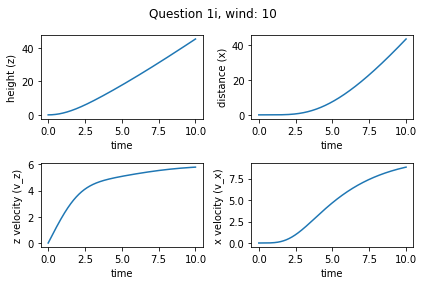

In [85]:
release_balloon(wx=10, tfinal = 10,changing = True)

All plots are for delta T of .001 seconds
final velocity:  11.620671237064789
final horizontal velocity:  9.9999999999976
final vertical velocity:  5.919459434778897


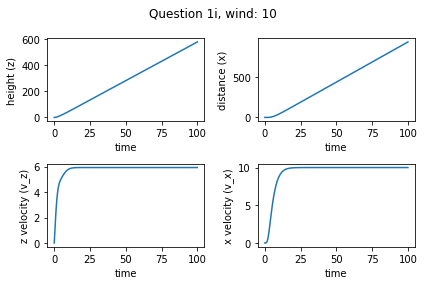

In [86]:
release_balloon(wx=10, tfinal = 100,changing = True)

The terminal velocity remains the same with a final vertical velocity of 5.919459 and a final horizontal velocity of 10 (wind speed), giving a total terminal velocity of 11.62067. The physics behind this remains the same as in part j. The main difference here is that now that the wind velocity is increasing as the balloon rises, it takes longer for the balloon's horizontal velocity to reach the (final converging) wind velocity, since it takes a while for the wind to reach this velocity. This can be seen through the "s" shaped curve in the horizontal velocity over time. Consequently, the balloon experiences horizontal air resistance for longer, which makes it take longer for the balloon to reach its horizontal terminal velocity.

In essence: 

1) Terminal velocity remains the same

2) Wind takes a while to converge upon its final velocity

3) Balloon battles horizontal air resistance for longer

4) Balloon takes longer to reach vertical terminal velocity due to coupling with relative horizontal velocity

5) In the end, things look the same.

### Exercise 2: Mathematical pendulum (85pt)

A mathematical pendulum consists of a point mass $m$ suspended by a
massless thread/rod of length $l$ in a gravitational field, as shown
in the figure here. The constraining force is labeled by $\boldsymbol{T}$ and
the gravitational force is labeled $\boldsymbol{F}_g$.  Homework assignments 6 and 7 may be useful to study here. Taylor chapter 5 is the relevant reference for this exercise.

<!-- dom:FIGURE: [figures/Simplependulum.png, width=600 frac=0.6]  -->
<!-- begin figure -->

<img src="figures/Simplependulum.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

We assume that the length $l$ is constant and we define the coordinates involved as

$$
\boldsymbol{r} = l\sin(\phi)\boldsymbol{i}+l\cos(\phi)\boldsymbol{j},
$$

where $\boldsymbol{i}$ and $\boldsymbol{j}$ are the unit vectors in the $x$ and $y$ directions, respectively.

* **2a (10pt):** Set up the forces acting on the system and show that the equation of motion is $m\ddot{\boldsymbol{r}}=\boldsymbol{F}_g+\boldsymbol{T}$.

Transforming to polar coordinates $r$ and $\phi$, 
the equation for $\phi$ is a second-order differential equation (you don't need to show this)

$$
\ddot{\phi}(t)=-\omega_0^2\sin{(\phi(t))}.
$$

This equation can be solved analytically if we assume that the angle $\phi$ is very small. Then we can approximate our equation as

$$
\ddot{\phi}(t)=-\omega_0^2\phi(t).
$$

* **2b (10pt):** Find the analytical solution for the last equation. Hint, look back at the solutions for the simple harmonic oscillator problem in one dimension in for example homework 6 and chapter 5 of Taylor.

For our numerical treatment of the full second-order differential  equation, we can proceed as we have done before and split the second-order differential in two first-order differential equations
as shown here

$$
\frac{d\dot{\phi}}{dt}=-\omega_0^2\sin{(\phi)}.
$$

and

$$
\frac{d\phi}{dt}=\dot{\phi}.
$$

* **2c (10pt):** Scale the equations in terms of a dimensionless time $\hat{t}=\omega_0t$. Choose between the Euler-Cromer, the Velocity-Verlet or the Runge-Kutta to fourth order and **write down** the algorithm for solving the last two equations numerically. Explain briefly your choice of numerical algorithm. Hint, look back at what you did in homework assignments 6 and 7 and the  midterms.

* **2d (15pt):** Choose initial conditions and compare your numerical solution with the analytical one. For which range of angles $\phi$ (determined by your initial conditions) are the analytical solutions comparable to your numerical results? Discuss the implications of your results.

* **2e (20pt):** Find the expressions for the kinetic and potential energies in terms of the variables $r$ and $\phi$. Remember that $r=l$ and is a constant throughout the calculations. In your code, check then whether energy is conserved by calculating the total energy, the kinetic and potential energies ad functions of time. Discuss your results. Do you expect energy to be conserved? 

* **2f (20pt):** With the potential $V$  and kinetic $T$ energy, define the Lagrangian for the mathematical pendulum discussed here. Add the constraint $r=l$ via a Lagrange multiplier $\lambda$ and derive the equations of motion. Show that these result in  $\ddot{\phi}(t)=-\omega_0^2\sin{(\phi(t))}$ with $\omega_0^2=g/l$ and $\lambda=ml\dot{\phi}^2+mg\cos{(\phi)}$.  How would you interpret $\lambda$?

For the numerical calculations we don't need to use the small angle approximation of sin(phi) is about phi. For the sake of comparing to my analytical solution, I will try the numerical solution both with and without the small angle approximation. We expect to see the analytical solution and the numeric solution match for any initial values when I use the small angle approximation in the numerical solution, so this will be a nice check. Note: This worked as intended, so the interesting stuff comes when I remove the small angle approximation for my numeric calculation.

In [57]:
#2d)
def pendulum_saa(phi0 = 0.26, omega0 = 1): #with small angle approximation
    if (phi0 < -3.14 or phi0 > 3.14):
        print("please enter a starting angle in standard form")
        return
    DeltaT = 0.001
    #set up arrays 
    tfinal = 20.0
    n = ceil(tfinal/DeltaT)
    # set up arrays for t, v, and r
    t = np.zeros(n)
    phi = np.zeros(n)
    phi_prime = np.zeros(n)

    #constants. I'm just setting things to one for ease
    omega02 = omega0**2

    # Initial conditions as compact 2-dimensional arrays
    phi[0] = phi0 #radians
    phi_prime[0] = 0

    # Start integrating using the Velocity-Verlet  method
    for i in range(n-1):
        a = -phi[i]*omega02
        
        # update using the Velocity-Verlet method
        phi[i+1] = phi[i] + DeltaT*phi_prime[i]+0.5*(DeltaT**2)*a
        # new accelerationfor the Verlet method
        anew = -phi[i+1]*omega02  
        phi_prime[i+1] = phi_prime[i] + 0.5*DeltaT*(a+anew)
        t[i+1] = t[i] + DeltaT
        
    analytic = phi0*np.cos(omega0*t)
    # Plot position as function of time    
    fig, ax = plt.subplots()
    ax.set_xlabel('time')
    ax.set_ylabel('angle [rad]')
    ax.plot(t,phi,label="numerical")
    ax.plot(t,analytic,label="analytical")
    fig.tight_layout()
    plt.legend()
    plt.title("With small angle approximation, initial angle=" + str(phi0) + " ,  omega0=" + str(omega0))
    plt.show()

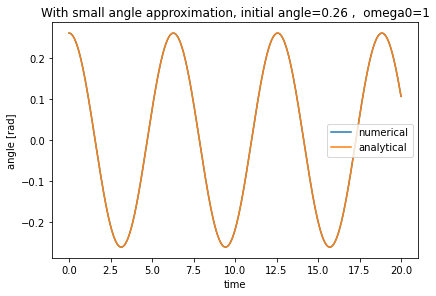

In [58]:
pendulum_saa()

The above shows the code is working, but isn't very illuminating. I've chosen it to default to omega0 = 1 and phi0 = 0.26 radians, under which case the numerical and analytic solutions look exactly the same. Next, I'll try changing around omega0 and the initial angle (phi0) to make sure they remain the identical.

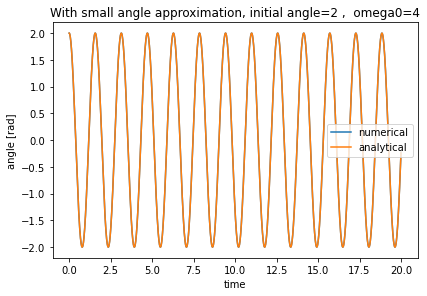

In [59]:
pendulum_saa(2,4)

Again, nothing super interesting. I played around with it a bit and confirmed that the numerical and analytical solutions match regardless of the constants chosen, so I'll move on to the numerical solution without the small angle approximation.

In [60]:
def pendulum(phi0 = 0.26, omega0 = 1): #with small angle approximation
    if (phi0 < -3.14 or phi0 > 3.14):
        print("please enter a starting angle in standard form")
        return
    DeltaT = 0.001
    #set up arrays 
    tfinal = 20.0
    n = ceil(tfinal/DeltaT)
    # set up arrays for t, v, and r
    t = np.zeros(n)
    phi = np.zeros(n)
    phi_prime = np.zeros(n)

    #constants. I'm just setting things to one for ease
    omega02 = omega0**2

    # Initial conditions as compact 2-dimensional arrays
    phi[0] = phi0 #radians
    phi_prime[0] = 0

    # Start integrating using the Velocity-Verlet  method
    for i in range(n-1):
        a = -np.sin(phi[i])*omega02
        
        # update using the Velocity-Verlet method
        phi[i+1] = phi[i] + DeltaT*phi_prime[i]+0.5*(DeltaT**2)*a
        # new accelerationfor the Verlet method
        anew = -np.sin(phi[i+1])*omega02  
        phi_prime[i+1] = phi_prime[i] + 0.5*DeltaT*(a+anew)
        t[i+1] = t[i] + DeltaT
        
    analytic = phi0*np.cos(omega0*t)
    # Plot position as function of time    
    fig, ax = plt.subplots()
    ax.set_xlabel('time')
    ax.set_ylabel('angle [rad]')
    ax.plot(t,phi,label="numerical")
    ax.plot(t,analytic,label="analytical")
    fig.tight_layout()
    plt.legend()
    plt.title("Pendulum, initial angle=" + str(phi0) + " ,  omega0=" + str(omega0))
    plt.show()
#     fig, ax = plt.subplots()
#     ax.set_xlabel('t[s]')
#     ax.set_ylabel('energy (J)')
#     ax.plot(t,.5*m*(v[:,0]**2 + v[:,1]**2),label = "kinetic energy") #KE = .5mv^2 = .5*m*(v_x^2 + v_y^2)
#     ax.plot(t,.5*k*(r[:,0]**2 + r[:,1]**2) + .5*m*(v[:,0]**2 + v[:,1]**2),label = "total energy")
#     fig.tight_layout()
#     plt.legend()
#     plt.title("Question 3a")
#     plt.show()

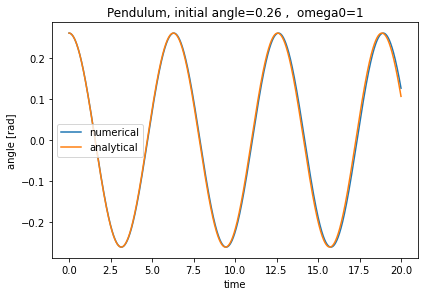

In [61]:
pendulum()

Although it's subtle, we can see that the numerical and analytical solutions are slowly becoming slightly different as time goes on. I'll mess with the parameters a bit to see at what starting angle they become substantially different.

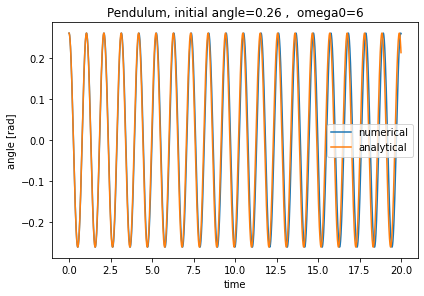

In [67]:
pendulum(phi0 = .26, omega0 = 6)

As we would expect, varying omega0 doesn't really have any noticable impact on the two solutions diverging. Due to the higher frequency, a slight difference between the two of them can be a little bit easier to see, but the divergence is primarily dependent upon the initial angle. I'll vary this around to see when the solutions diverge dramatically.

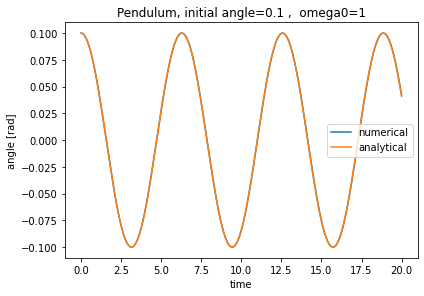

In [72]:
pendulum(phi0 = .1)

The above graph is with an initial angle of 0.1 radians, which really just goes to show the dependence on the initial angle. With phi0 = 0.1, the two solutions are indistinguishable.

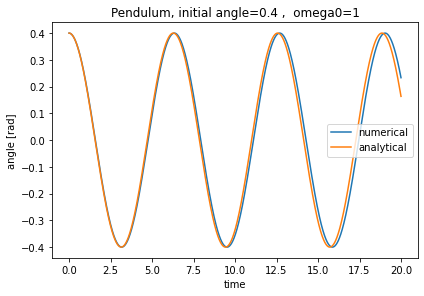

In [75]:
pendulum(phi0 = .4)

By the time we get to an initial angle of 0.4, the solutions become quite noticeably different after only a few cycles. Next, I'll crank the angle way up just to show how bad it can get.

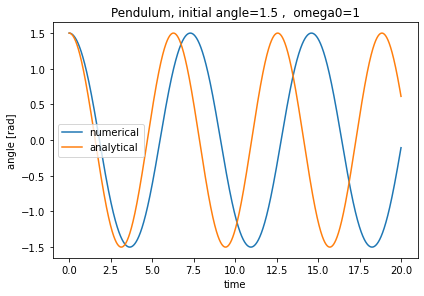

In [76]:
pendulum(phi0 = 1.5)

With a starting angle of 1.5 radians, we can see that the two solutions are completely out of phase with each other. What I have essentially shown is that for anything under around 0.25 radians (magnitude) or about 14 to 15 degrees, the numerical and analytical solutions match each other very well. Above this and they start to become out of phase with each other. This is evidence for the fact that the small angle approximation used in the analytical calculation of sin(phi) = phi is only appropriate to use under around 15 degrees.

2e) Derivations for energy formulae on written paper. I found potential energy of mgl(1-cos(phi)) and kinetic energy of .5*m*l^2*phi_dot^2. If we wanted to, we could leave it in terms of r instead of l, meaning V = mgr(1-cos(phi)) and K = .5m(r^2)(phi_dot^2) where phi_dot is the derivative of phi.

Since omega0^2 = g/l, I'll choose to define g=1 and therefore l=1/omega0^2. I could easily hold length constant and change the gravity but it doesn't really matter either way, and I feel it makes more sense to change the length than change the planet the pendulum is on.

Now, I'll plot these energies to verify that total energy is conserved with the pendulum.

In [93]:
def energies(phi0 = 0.26, omega0 = 1): #with small angle approximation
    if (phi0 < -3.14 or phi0 > 3.14):
        print("please enter a starting angle in standard form")
        return
    DeltaT = 0.001
    #set up arrays 
    tfinal = 20.0
    n = ceil(tfinal/DeltaT)
    # set up arrays for t, v, and r
    t = np.zeros(n)
    phi = np.zeros(n)
    phi_prime = np.zeros(n)

    #constants. I'm just setting things to one for ease
    omega02 = omega0**2
    l = 1/(omega0**2)
    m = 1
    g = 1

    # Initial conditions as compact 2-dimensional arrays
    phi[0] = phi0 #radians
    phi_prime[0] = 0

    # Start integrating using the Velocity-Verlet  method
    for i in range(n-1):
        a = -np.sin(phi[i])*omega02
        
        # update using the Velocity-Verlet method
        phi[i+1] = phi[i] + DeltaT*phi_prime[i]+0.5*(DeltaT**2)*a
        # new accelerationfor the Verlet method
        anew = -np.sin(phi[i+1])*omega02  
        phi_prime[i+1] = phi_prime[i] + 0.5*DeltaT*(a+anew)
        t[i+1] = t[i] + DeltaT
        
    # Plot position as function of time    
    fig, ax = plt.subplots()
    ax.set_xlabel('time')
    ax.set_ylabel('angle [rad]')
    ax.plot(t,phi)
    fig.tight_layout()
    plt.title("Pendulum, initial angle=" + str(phi0) + " ,  omega0=" + str(omega0))
    plt.show()
    
    kinetic = .5*m*l*l*(phi_prime**2)
    potential = m*g*l*(1-np.cos(phi))
    
    fig, ax = plt.subplots()
    ax.set_xlabel('time')
    ax.set_ylabel('energy (J)')
    ax.plot(t,kinetic,label = "kinetic energy")
    ax.plot(t,potential, label = "potential energy")
    ax.plot(t,kinetic+potential,label = "total energy")
    fig.tight_layout()
    plt.legend()
    plt.title("Pendulum, initial angle=" + str(phi0) + " ,  omega0=" + str(omega0))
    plt.show()

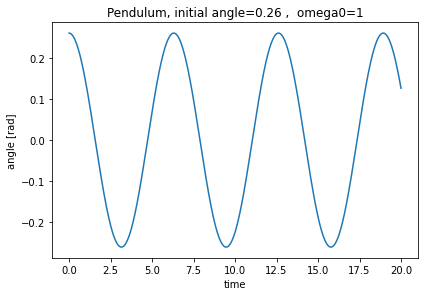

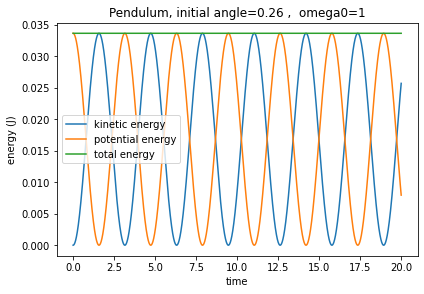

In [94]:
energies()

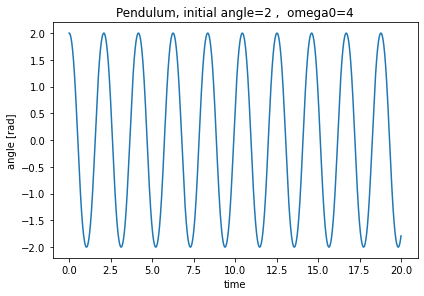

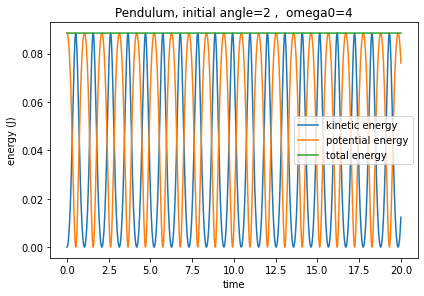

In [95]:
energies(2,4)

As we can see from the above graphs, kinetic and potential energies are out of phase with each other, and result in the total energy being held constant. This remains the case regardless of our initial angle or our value for omega0, which is good. We would expect the total energy to remain constant because we have a pendulum with no driving force and no resistance, so no energy should be entering or leaving the system.

### Classical Mechanics Extra Credit Assignment: Scientific Writing and attending Talks

The following gives you an opportunity to earn **five extra credit
points** on each of the remaining homeworks and **ten extra credit points**
on the midterms and finals.  This assignment also covers an aspect of
the scientific process that is not taught in most undergraduate
programs: scientific writing.  Writing scientific reports is how
scientist communicate their results to the rest of the field.  Knowing
how to assemble a well written scientific report will greatly benefit
you in you upper level classes, in graduate school, and in the work
place.

The full information on extra credits is found at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>. There you will also find examples on how to write a scientific article. 
Below you can also find a description on how to gain extra credits by attending scientific talks.

This assignment allows you to gain extra credit points by practicing
your scientific writing.  For each of the remaining homeworks you can
submit the specified section of a scientific report (written about the
numerical aspect of the homework) for five extra credit points on the
assignment.  For the two midterms and the final, submitting a full
scientific report covering the numerical analysis problem will be
worth ten extra points.  For credit the grader must be able to tell
that you put effort into the assignment (i.e. well written, well
formatted, etc.).  If you are unfamiliar with writing scientific
reports, [see the information here](https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/IntroductionScientificWriting.md)

The following table explains what aspect of a scientific report is due
with which homework.  You can submit the assignment in any format you
like, in the same document as your homework, or in a different one.
Remember to cite any external references you use and include a
reference list.  There are no length requirements, but make sure what
you turn in is complete and through.  If you have any questions,
please contact us.

<table class="dotable" border="1">
<thead>
<tr><th align="center">  HW/Project </th> <th align="center">Due Date</th> <th align="center">Extra Credit Assignment</th> </tr>
</thead>
<tbody>
<tr><td align="center">   HW 3             </td> <td align="center">   2-8         </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 4             </td> <td align="center">   2-15        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 5             </td> <td align="center">   2-22        </td> <td align="center">   Methods                    </td> </tr>
<tr><td align="center">   HW 6             </td> <td align="center">   3-1         </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 1**    </td> <td align="center">   **3-12**    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 7             </td> <td align="center">   3-22        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 8             </td> <td align="center">   3-29        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 9             </td> <td align="center">   4-5         </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 2**    </td> <td align="center">   **4-16**    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 10            </td> <td align="center">   4-26        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   **Final**        </td> <td align="center">   **4-30**    </td> <td align="center">   *Full Written Report*      </td> </tr>
</tbody>
</table>

You can also gain extra credits if you attend scientific talks.
This is described here.

### Integrating Classwork With Research

This opportunity will allow you to earn up to 5 extra credit points on a Homework per week. These points can push you above 100% or help make up for missed exercises.
In order to earn all points you must:

1. Attend an MSU research talk (recommended research oriented Clubs is  provided below)

2. Summarize the talk using at least 150 words

3. Turn in the summary along with your Homework.

Approved talks:
Talks given by researchers through the following clubs:
* Research and Idea Sharing Enterprise (RAISE)​: Meets Wednesday Nights Society for Physics Students (SPS)​: Meets Monday Nights

* Astronomy Club​: Meets Monday Nights

* Facility For Rare Isotope Beam (FRIB) Seminars: ​Occur multiple times a week

All the material on extra credits is at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>.